**21022008_NguyenHuuTho**

In [ ]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

In [ ]:
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np. zeros(y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()

In [ ]:
X=np.array(([0,0],[0,1],[1,0],[1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0:
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.73133518]
 [0.75673572]
 [0.77570068]
 [0.79609461]]
Loss: 
0.31952636748103513


for iteration # 100

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.49933448]
 [0.50103342]
 [0.50182924]
 [0.50295525]]
Loss: 
0.24986016360301877


for iteration # 200

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.46586382]
 [0.52315447]
 [0.51405278]
 [0.53075023]]
Loss: 
0.24056281528369616


for iteration # 300

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.29730786]
 [0.6517818 ]
 [0.64481825]
 [0.42427878]]
Loss: 
0.1289536089289729


for iteration # 400

Input : 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.168185  ]
 [0.840353

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# khởi tạo mô hình Sequential
classifier = Sequential()

# thêm lớp Dense đầu tiên với input_dim=2, số nút là 2 và hàm kích hoạt là sigmoid
classifier.add(Dense(2, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim=2))

# thêm lớp Dense thứ hai với 1 nút và hàm kích hoạt là sigmoid
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
'''
verbose=0: không hiển thị thông tin gì cả.
verbose=1: hiển thị tiến trình huấn luyện dưới dạng thanh tiến trình.
verbose=2: cho mỗi epoch, hiển thị một dòng thông tin.
'''


In [ ]:
loss, accuracy = classifier.evaluate(X_train, y_train, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 66.67


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

1/1 [==============================] - 0s 146ms/step


In [ ]:
print(y_pred.shape)

(1, 1)


In [ ]:
y_pred = (y_pred > 0.5)
for i in range(min(5, len(y_pred))):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

[1.0, 0.0] => 0 (expected 1)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0],
       [1, 0]])

In [ ]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


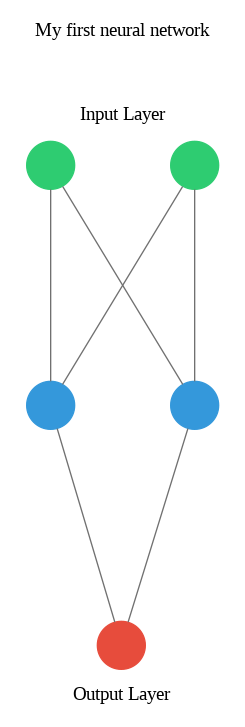

In [ ]:
from ann_visualizer.visualize import ann_viz;
import pydot
import graphviz
from IPython.display import Image

ann_viz(classifier, view=True, filename="Img_NetWork_Baitap2.gv", title="My first neural network")

# Convert .dot file to .png file
(graph,) = pydot.graph_from_dot_file('Img_NetWork_Baitap2.gv')
graph.write_png('Img_NetWork_Baitap2.png')

# Display the image in Jupyter notebook
Image(filename='Img_NetWork_Baitap2.png')